In [1]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
train_data= pd.read_csv('C:/Users/priyanka.CHEF5GWTN2/Desktop/Hackathon/Airplane Accident/3c055e822d5b11ea/train.csv', encoding='utf-8-sig')
validate_data= pd.read_csv('C:/Users/priyanka.CHEF5GWTN2/Desktop/Hackathon/Airplane Accident/3c055e822d5b11ea/test.csv', encoding='utf-8-sig')

In [3]:
train_data.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [4]:
validate_data.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [5]:
train_data.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

Categorical features: Accident_Type_Code, Violations
Numerical features: Safety_Score, Days_Since_Inspection, Total_Safety_Complaints, Control_Metric,Turbulence_In_gforces, Cabin_Temperature, Max_Elevation, Adverse_Weather_Metric

In [6]:
train_data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


In [7]:
# Missing values in train data
pd.DataFrame({'missing_counts': train_data.apply(lambda x: np.sum(x.isnull())), 'unique': train_data.apply(lambda x: x.nunique()), 'data_types': train_data.dtypes})

,missing_counts,unique,data_types
Severity,0,4,object
Safety_Score,0,1175,float64
Days_Since_Inspection,0,23,int64
Total_Safety_Complaints,0,44,int64
Control_Metric,0,952,float64
Turbulence_In_gforces,0,1117,float64
Cabin_Temperature,0,950,float64
Accident_Type_Code,0,7,int64
Max_Elevation,0,4191,float64
Violations,0,6,int64


In [8]:
train_data.Severity.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

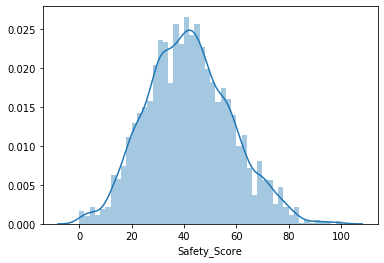

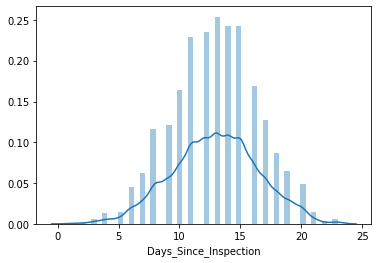

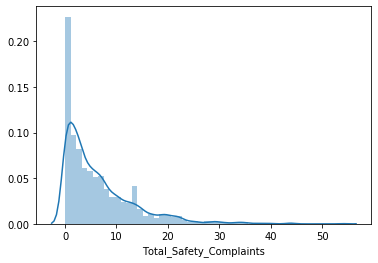

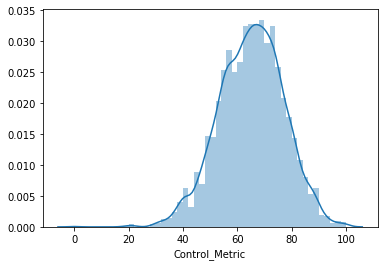

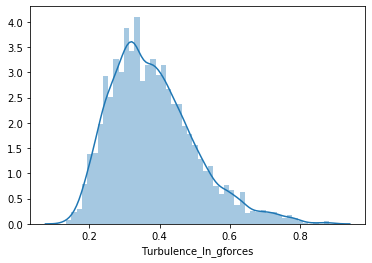

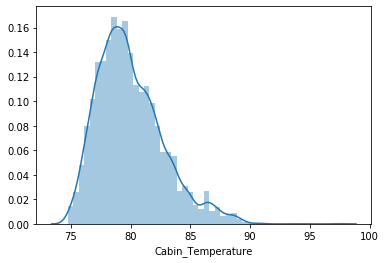

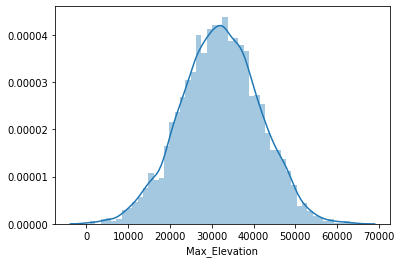

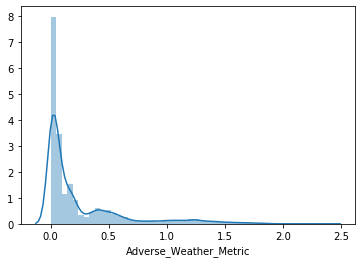

In [9]:
# Univariate analysis with Histogram
cols = ['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces','Cabin_Temperature','Max_Elevation', 'Adverse_Weather_Metric']
for col in cols: 
    plt.figure(1)
    sns.distplot(train_data[col])
    plt.show()

Text(0, 0.5, 'Count')

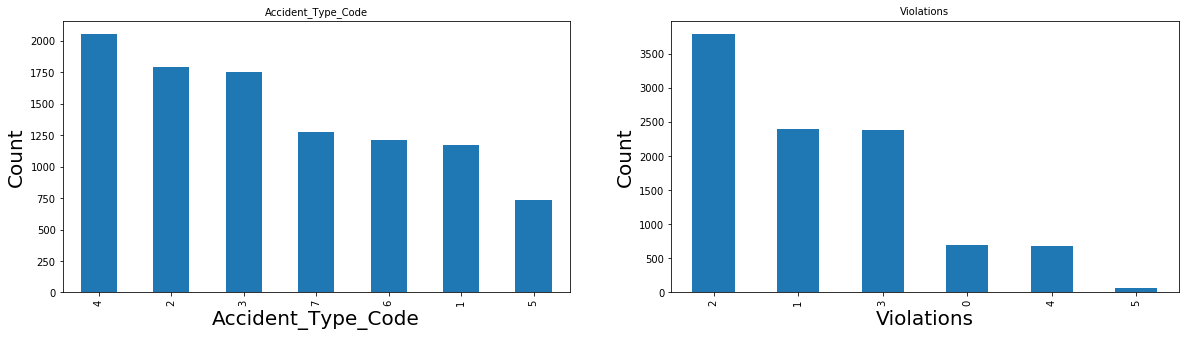

In [10]:
# Bivariate Analysis- Nominal & Ordinal Variables
plt.figure(1)
plt.subplot(121)
train_data.Accident_Type_Code.value_counts().plot.bar(figsize=(20,5))
plt.title('Accident_Type_Code', fontsize=10)
plt.xlabel('Accident_Type_Code', fontsize = 20.0)
plt.ylabel('Count', fontsize = 20.0)

plt.subplot(122)
train_data.Violations.value_counts().plot.bar(figsize=(20,5))
plt.title('Violations', fontsize=10)
plt.xlabel('Violations', fontsize = 20.0)
plt.ylabel('Count', fontsize = 20.0)

In [11]:
# Split train, test and validate data

from sklearn.model_selection import train_test_split
X = train_data.drop(['Accident_ID','Severity'],axis=1)
y = train_data['Severity']

validate_X = validate_data.drop(['Accident_ID'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Train data Logistic regression Accuracy: {:.3f}'.format(accuracy_score(y_train, logreg.predict(X_train))))
print('Test data Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Train data Logistic regression Accuracy: 0.551
Test data Logistic regression accuracy: 0.550


In [13]:
# Decision Tree Model

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10)}

tree = GridSearchCV(DecisionTreeClassifier( max_depth = 9), param_grid, cv = 10)
tree.fit( X_train, y_train )
print('Train data Decision Tree Accuracy: {:.3f}'.format(accuracy_score(y_train, tree.predict(X_train))))
print('Test data Decision Tree Accuracy: {:.3f}'.format(accuracy_score(y_test, tree.predict(X_test))))

Train data Decision Tree Accuracy: 0.955
Test data Decision Tree Accuracy: 0.922


In [14]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print('Train data Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_train, rf.predict(X_train))))
print('Test data Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Train data Random Forest Accuracy: 1.000
Test data Random Forest Accuracy: 0.926


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.95      0.92      0.93       925
              Minor_Damage_And_Injuries       0.89      0.94      0.91       739
      Significant_Damage_And_Fatalities       0.90      0.92      0.91       485
Significant_Damage_And_Serious_Injuries       0.95      0.93      0.94       851

                               accuracy                           0.93      3000
                              macro avg       0.92      0.93      0.92      3000
                           weighted avg       0.93      0.93      0.93      3000



In [21]:
# Confusion matrix of random forest
from sklearn.metrics import confusion_matrix
print (" Confusion matrix ", confusion_matrix(y_test, rf.predict(X_test)))

 Confusion matrix  [[848  39  23  15]
 [ 15 694  18  12]
 [  7  16 446  16]
 [ 25  31   6 789]]


In [17]:
# cnf_matrix = confusion_matrix(y_train, y_pred,labels=['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities', 'Significant_Damage_And_Serious_Injuries'])
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities', 'Significant_Damage_And_Serious_Injuries'])

In [22]:
# Support Vector Machine

from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)
prediction=svc.predict(X_test)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_train, svc.predict(X_train))))
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, prediction)))

Support vector machine accuracy: 1.000
Support vector machine accuracy: 0.359


Text(0.5, 1.0, 'Feature Importance- RandomForest')

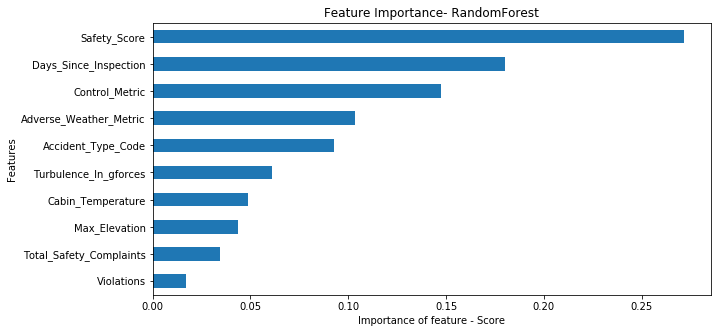

In [23]:
importances=pd.Series(rf.feature_importances_, index=X.columns).sort_values()
importances.plot(kind='barh', figsize=(10,5))
plt.xlabel('Importance of feature - Score')
plt.ylabel('Features')
plt.title("Feature Importance- RandomForest")

In [20]:
pred_test = pd.DataFrame(rf.predict(validate_X))
pred_test.columns = ['Severity']

In [24]:
submission_data= validate_data[['Accident_ID']]
submission_data['Severity'] = pred_test['Severity']
submission_data.to_csv('C:/Users/priyanka.CHEF5GWTN2/Desktop/Hackathon/Airplane Accident/3c055e822d5b11ea/submission.csv', index=False)